In [1]:
import numpy as np
import random
import time
import warnings
import math
import matplotlib.pyplot as plt

# Suppress runtime warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
def f1(x, d):
    f = 0
    for i in range(d):
        f += x[i] ** 2
    return f

def f2(x,d):
    s = 0
    p = 1
    for i in range(d):
        s += abs(x[i])
    for i in range(d):
        p *= abs(x[i])
    f = s + p
    return f

def f3(x,d):
    f = 0
    for i in range(1,d+1):
        s = 0
        for j in range(i):
            s += x[j]
        f += s**2
    return f

def f4(x,d):
    f = float("-inf")
    for i in range(d):
        if abs(x[i]) > f:
            f = abs(x[i])
    return f

def f5(x,d):
    f = 0
    for i in range(d-1):
        f += 100*((x[i+1] - x[i]**2)**2) + (x[i] - 1)**2
    return f

def f6(x,d):
    f = 0
    for i in range(d):
        f += abs(x[i] + 0.5) ** 2
    return f

def f7(x,d):
    f = 0
    for i in range(d):
        f += (i+1.0) * (x[i] ** 4.0)
    return f + np.random.uniform(0,1)

def f8(x,d):
    f = 0
    for i in range(d):
        f += -(x[i] * math.sin(math.sqrt(abs(x[i]))))
    return f

def f9(x,d):
    f = 0
    p = math.pi
    for i in range(d):
        f += ((x[i]**2) - (10 * math.cos(2*p*x[i])) + 10)
    return f

def f10(x,d):
    p = math.pi
    s = 0
    n = 0
    for i in range(d):
        s += x[i]**2
    for i in range(d):
        n += math.cos(2*p*x[i])
    f = (-20 * np.exp(-0.2 * math.sqrt((1/d) * s))) - np.exp((1/d) * n) + 20 + np.e
    return f

def f11(x, d):
    p=1
    s = 0
    for i in range(d):
        p = p * math.cos(x[i]/math.sqrt(i+1))
        s += x[i]**2
    f =  (s/4000) - p + 1.0
    return f

def f12(n,d):
    def u(s,a,k,m):
        if s > a:
            return (k*((s-a)**m))
        elif s < -a:
            return (k*((-s-a)**m))
        else:
            return 0
    def y(s):
        return (1 + 0.25*(s+1))
    a = 10
    k = 100
    m = 4
    ui = 0
    xi = 0
    p = math.pi
    for i in range(d):
        ui += u(n[i],a,k,m)
    for i in range(d-1):
        xi += ((y(n[i])-1)**2) * (1 + 10*(math.sin(p*y(n[i+1]))**2))
    f = (p/(d+1)) * ( 10*(math.sin(p*y(n[0]))**2) + xi + (y(n[-1]) - 1)**2) + ui
    return f



def f13(n,d):
    def u(s,a,k,m):
        if s > a:
            return (k*((s-a)**m))
        elif s < -a:
            return (k*((-s-a)**m))
        else:
            return 0
    a = 5
    k = 100
    m = 4
    ui = 0
    xi = 0
    p = math.pi
    for i in range(d):
        ui += u(n[i],a,k,m)
    for i in range(d-1):
        xi += ((n[i]-1)**2) * (1 + math.sin(3*p*n[i+1])**2)
    f = 0.1 * ( (math.sin(3*p*n[0])**2) + xi + (((n[-1] - 1)**2) * (1 + math.sin(2*p*n[-1])**2)) ) + ui
    return f

def f14(x, d):
    f = 0
    a = [[-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32],
         [-32,-32,-32,-32,-32,-16,-16,-16,-16,-16,0,0,0,0,0,16,16,16,16,16,32,32,32,32,32]]
    for j in range(1,26):
        s = 0
        for i in range(1,3):
            s += ((x[i-1]-a[i-1][j-1])**6)
        f += 1/(j+s)
    f = (1/((1/500) + f))
    return f

# Kowalik
def f15(m,d):
    aK=[.1957,.1947,.1735,.16,.0844,.0627,.0456,.0342,.0323,.0235,.0246]
    bK=[.25,.5,1,2,4,6,8,10,12,14,16]
    aK=np.asarray(aK)
    bK=np.asarray(bK)
    bK = 1/bK
    fit=np.sum((aK-((m[0]*(bK**2+m[1]*bK))/(bK**2+m[2]*bK+m[3])))**2)
    return fit

# Six Hump Camel function
def f16(x, d):
    f = ((4 - 2.1*(x[0]**2) + (x[0]**4)/3)*(x[0]**2)) + x[0]*x[1] + ((-4 + 4*(x[1]**2))*(x[1]**2))
    return f
# range = [-5, 5], d=2, value = −1.0316, n= 100, iter = 5000, p=20, I=C= 0.1, y1=y2=1


def f17(x, d):
    p = math.pi
    f = ((x[1] - (5.1/(4*(p**2)))*(x[0]**2) + ((5/p)*x[0]) - 6)**2) + (10*(1-(1/(8*p)))*math.cos(x[0])) + 10
    return f
# range = [-5,5], d = 2, value = 0.398


# Goldstein Price Function
def f18(x, d):
    s = 30 + (((2*x[0]) - (3*x[1]))**2) * (18-(32*x[0]) + (12*(x[0]**2)) + (48*x[1]) - (36*x[0]*x[1]) + (27*(x[1]**2)))
    first = (1 + ((x[0]+x[1]+1)**2) * (19-(14*x[0])+(3*(x[0]**2))-(14*x[1])+(6*x[0]*x[1])+ (3*(x[1]**2))))
    f = first * s
    return f
# range = [-2,2], d = 2, value = 3


# hartmann function 3
def f19(x, d):
    A = np.array([[ 3. , 10. , 30. ], [ 0.1, 10. , 35. ], [ 3. , 10. , 30. ], [ 0.1, 10. , 35. ]])
    P = np.array([[ 0.3689, 0.117 , 0.2673], [ 0.4699, 0.4387, 0.7470 ], [ 0.1091 , 0.8732, 0.5547], [ 0.0381, 0.5743, 0.8828]])
    alpha = np.array([1.0, 1.2, 3.0, 3.2])
    f = 0
    for i in range(4):
        s = 0
        for j in range(3):
            s += (A[i][j] * (x[j] - P[i][j])**2)
        f += (alpha[i] * np.exp(-s))
    return -f
# range = [0,1], d=3, value = -3.86278, n= 100, iter = 5000, p=20, I=C= 0.1, y1=y2=1


# hartmann function 6
def f20(x, d):
    A = np.array([[10, 3, 17, 3.50, 1.7, 8],
                [0.05, 10, 17, 0.1, 8, 14],
                [3, 3.5, 1.7, 10, 17, 8],
                [17, 8, 0.05, 10, 0.1, 14]])
    P = np.array([[0.1312, 0.1696, 0.5569, 0.0124, 0.8283, 0.5886],
                [0.2329, 0.4135, 0.8307, 0.3736, 0.1004, 0.9991],
                [0.2348, 0.1451, 0.3522, 0.2883, 0.3047, 0.6650],
                [0.4047, 0.8828, 0.8732, 0.5743, 0.1091, 0.0381]])
    alpha = np.array([1.0, 1.2, 3.0, 3.2])
    alpha = alpha.transpose()
    f = 0
    for i in range(4):
        s = 0
        for j in range(6):
            s += (A[i][j] * ((x[j] - P[i][j])**2))
        f += (alpha[i] * np.exp(-s))
    return -f
# range = [0,1], d=6, value = -3.32278, n= 100, iter = 5000, p=20, I=C= 0.1, y1=y2=1


# shekel 5
def f21(x,d):
    a = [[4,4,4,4],
        [1,1,1,1],
        [8,8,8,8],
        [6,6,6,6],
        [3,7,3,7]]
    c = [0.1,0.2,0.2,0.4,0.4]
    f = 0
    s = 0
    for i in range(5):
        for j in range(d):
            s += ((x[j] - a[i][j])**2)
        f += (1/(s + c[i]))
    return -f
#range = [0,10], d = 4, value = -10.1532


# shekel 7
def f22(x,d):
    a = [[4,4,4,4],
        [1,1,1,1],
        [8,8,8,8],
        [6,6,6,6],
        [3,7,3,7],
        [2,9,2,9],
        [5,5,3,3]]
    c = [0.1,0.2,0.2,0.4,0.4,0.6,0.3]
    f = 0
    s = 0
    for i in range(7):
        for j in range(d):
            s += ((x[j] - a[i][j])**2)
        f += (1/(s + c[i]))
    return -f
#range = [0,10], d = 4, value = -10.4028

# shekel 10
def f23(x,d):
    a = [[4,4,4,4],
        [1,1,1,1],
        [8,8,8,8],
        [6,6,6,6],
        [3,7,3,7],
        [2,9,2,9],
        [5,5,3,3],
        [8,1,8,1],
        [6,2,6,2],
        [7,3.6,7,3.6]]
    c = [0.1,0.2,0.2,0.4,0.4,0.6,0.3,0.7,0.5,0.5]
    f = 0
    s = 0
    for i in range(10):
        for j in range(d):
            s += ((x[j] - a[i][j])**2)
        f += (1/(s + c[i]))
    return -f
#range = [0,10], d = 4, value = -10.5363

In [3]:
def WaOA(obj_func, dim, N, max_iter, lb, ub):
    """
    Implementation of the Walrus Optimization Algorithm (WaOA)
    Based on the paper: A new bio-inspired metaheuristic algorithm for solving optimization problems based on walruses behavior
    DOI: https://doi.org/10.1038/s41598-023-35863-5
    """

    # Ensure lb and ub are numpy arrays for broadcasting
    if not isinstance(lb, np.ndarray):
        lb = np.full(dim, lb)
    if not isinstance(ub, np.ndarray):
        ub = np.full(dim, ub)

    # Initialization
    pop = lb + (ub - lb) * np.random.rand(N, dim)  # Eq. (1)
    fitness = np.array([obj_func(ind, dim) for ind in pop]) # Eq. (2)

    # Find the best member (Strongest Walrus, SW)
    sw_idx = np.argmin(fitness)
    sw_pos = pop[sw_idx].copy()
    sw_fitness = fitness[sw_idx]

    convergence_history = []

    # Main algorithm loop
    for t_iter in range(max_iter):
        # Update the Strongest Walrus (SW)
        current_best_idx = np.argmin(fitness)
        if fitness[current_best_idx] < sw_fitness:
            sw_pos = pop[current_best_idx].copy()
            sw_fitness = fitness[current_best_idx]

        convergence_history.append(sw_fitness)

        # Use 1-based iteration counter 't' for equations
        t = t_iter + 1

        # Calculate local bounds for Phase 3 (Eq. 8)
        lb_local = lb / t
        ub_local = ub / t

        # Create copies of the population for Phase 2 calculation
        pop_copy = pop.copy()
        fitness_copy = fitness.copy()

        for i in range(N):
            # --- Phase 1: Feeding strategy (Exploration) --- (Eq. 3 & 4)
            I_p1 = np.random.randint(1, 3, size=dim)
            rand_p1 = np.random.rand(dim)
            new_pos_p1 = pop[i] + rand_p1 * (sw_pos - I_p1 * pop[i])
            new_pos_p1 = np.clip(new_pos_p1, lb, ub)
            new_fitness_p1 = obj_func(new_pos_p1, dim)

            if new_fitness_p1 < fitness[i]:
                pop[i] = new_pos_p1
                fitness[i] = new_fitness_p1

            # --- Phase 2: Migration --- (Eq. 5 & 6)
            # Select a random walrus X_k from the pre-iteration population
            k = np.random.randint(0, N)
            while k == i:
                k = np.random.randint(0, N)

            X_k = pop_copy[k]
            F_k = fitness_copy[k]

            I_p2 = np.random.randint(1, 3, size=dim)
            rand_p2 = np.random.rand(dim)

            if F_k < fitness[i]:
                new_pos_p2 = pop[i] + rand_p2 * (X_k - I_p2 * pop[i])
            else:
                new_pos_p2 = pop[i] + rand_p2 * (pop[i] - X_k)

            new_pos_p2 = np.clip(new_pos_p2, lb, ub)
            new_fitness_p2 = obj_func(new_pos_p2, dim)

            if new_fitness_p2 < fitness[i]:
                pop[i] = new_pos_p2
                fitness[i] = new_fitness_p2

            # --- Phase 3: Escaping and fighting against predators (Exploitation) --- (Eq. 7, 8, 9)
            rand_p3 = np.random.rand(dim)
            # Eq. (7) from the paper
            perturbation = lb_local + (ub_local - rand_p3 * lb_local)
            new_pos_p3 = pop[i] + perturbation
            new_pos_p3 = np.clip(new_pos_p3, lb, ub)
            new_fitness_p3 = obj_func(new_pos_p3, dim)

            if new_fitness_p3 < fitness[i]:
                pop[i] = new_pos_p3
                fitness[i] = new_fitness_p3

        # --- End of inner loop (all walruses updated) ---

    # Final check for best solution after all iterations
    final_best_idx = np.argmin(fitness)
    if fitness[final_best_idx] < sw_fitness:
        sw_pos = pop[final_best_idx].copy()
        sw_fitness = fitness[final_best_idx]

    # Return the best position, best fitness, and the history
    return sw_pos, sw_fitness, convergence_history

In [4]:
def plot_convergence(history, function_name):
    """
    Plots the convergence history of the algorithm, using a logarithmic
    scale for specific functions to match the GRO paper's visualization.
    """
    plt.figure(figsize=(10, 6))

    # List of functions that use a log scale in the GRO paper
    log_scale_functions = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7',
                           'f10', 'f11', 'f12', 'f13', 'f14', 'f15']

    # Apply logarithmic scale if the function name is in the list
    if function_name.lower() in log_scale_functions:
        plt.yscale('log')
        # Handle zero values for log scale by replacing them with a very small number
        history_plot = [val if val > 0 else 1e-16 for val in history]
    else:
        # Use a linear scale for all other functions
        history_plot = history

    plt.plot(history_plot, color='b', linewidth=2)
    plt.title(f'WartOA Convergence for {function_name}')
    plt.xlabel('Iteration')
    plt.ylabel('Best Fitness Value (Log Scale where appropriate)')
    plt.grid(True)
    plt.show()

Running Paper Implementation of WartOA
Parameters: Pop Size=30, Max Iterations=500, Runs=30

--- Testing Function: f1 ---
  Run 30/30, Best Fitness: 1.915540e-159
-------------------------
Results for f1:
  AVRG : 2.571604e-158
  STD :  5.063149e-158
  Time Taken:   44.64 seconds
-------------------------


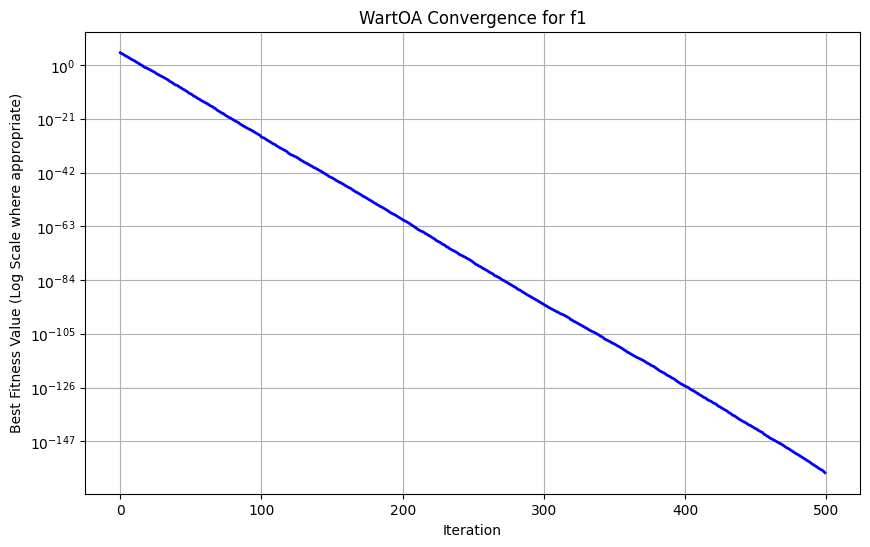


--- Testing Function: f2 ---
  Run 30/30, Best Fitness: 2.450739e-86
-------------------------
Results for f2:
  AVRG : 2.293261e-85
  STD :  4.965783e-85
  Time Taken:   56.85 seconds
-------------------------


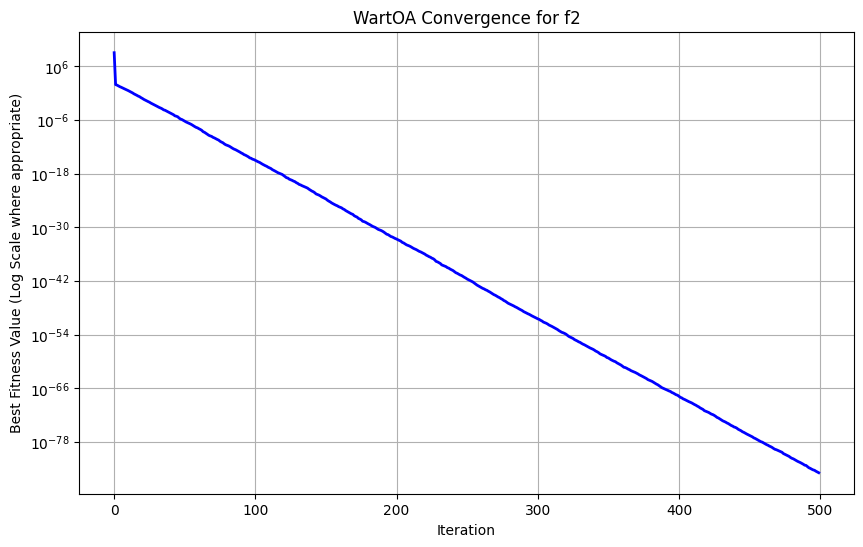


--- Testing Function: f3 ---
  Run 30/30, Best Fitness: 2.084887e-97
-------------------------
Results for f3:
  AVRG : 1.218740e-92
  STD :  6.063354e-92
  Time Taken:   179.15 seconds
-------------------------


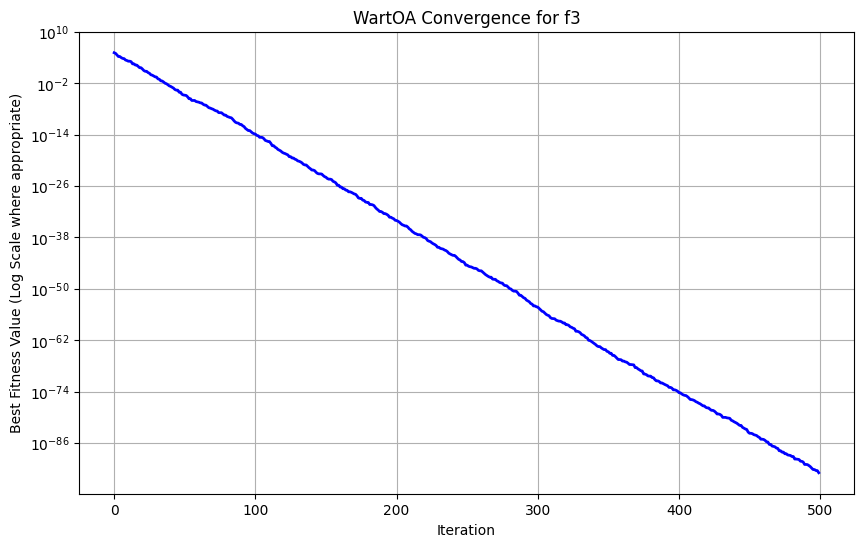


--- Testing Function: f4 ---
  Run 30/30, Best Fitness: 3.537591e-71
-------------------------
Results for f4:
  AVRG : 1.729567e-70
  STD :  2.456280e-70
  Time Taken:   41.07 seconds
-------------------------


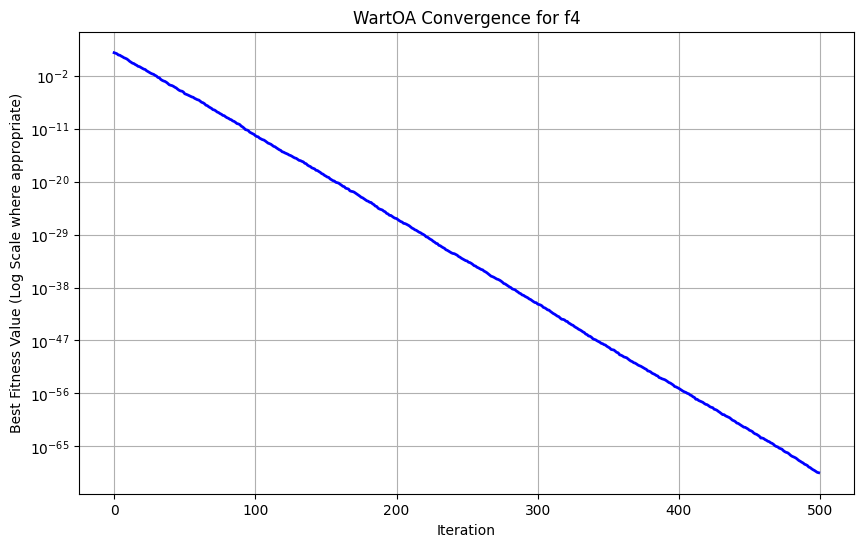


--- Testing Function: f5 ---
  Run 30/30, Best Fitness: 2.669550e+01
-------------------------
Results for f5:
  AVRG : 2.641111e+01
  STD :  1.594255e+00
  Time Taken:   84.74 seconds
-------------------------


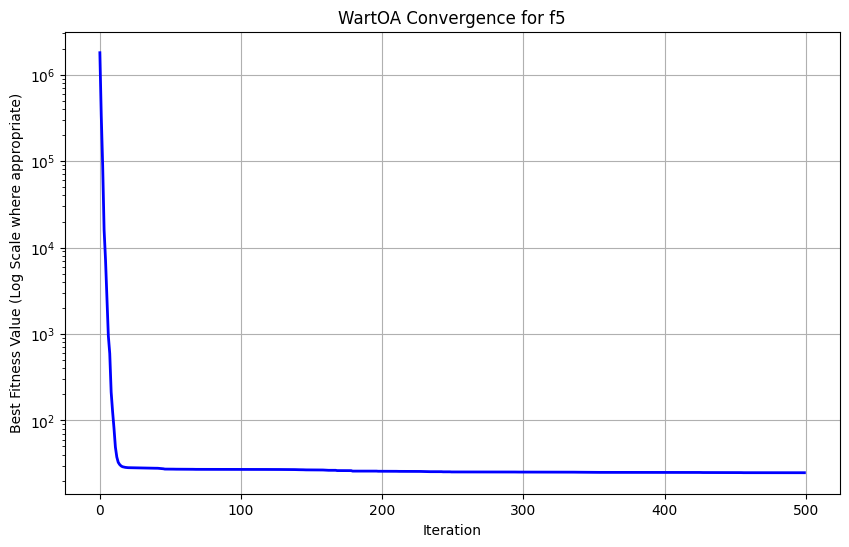


--- Testing Function: f6 ---
  Run 30/30, Best Fitness: 2.224138e+00
-------------------------
Results for f6:
  AVRG : 2.494027e+00
  STD :  2.817647e-01
  Time Taken:   52.00 seconds
-------------------------


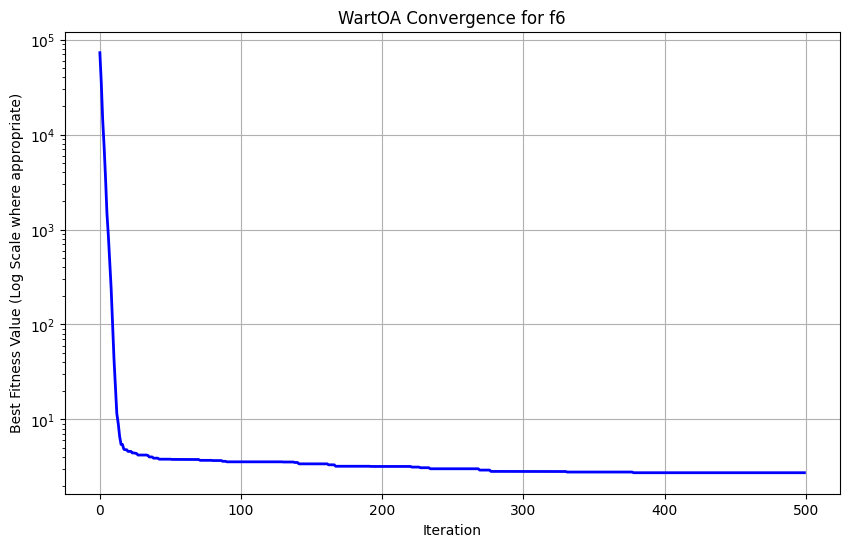


--- Testing Function: f7 ---
  Run 30/30, Best Fitness: 1.050790e-04
-------------------------
Results for f7:
  AVRG : 1.451776e-04
  STD :  6.989757e-05
  Time Taken:   57.69 seconds
-------------------------


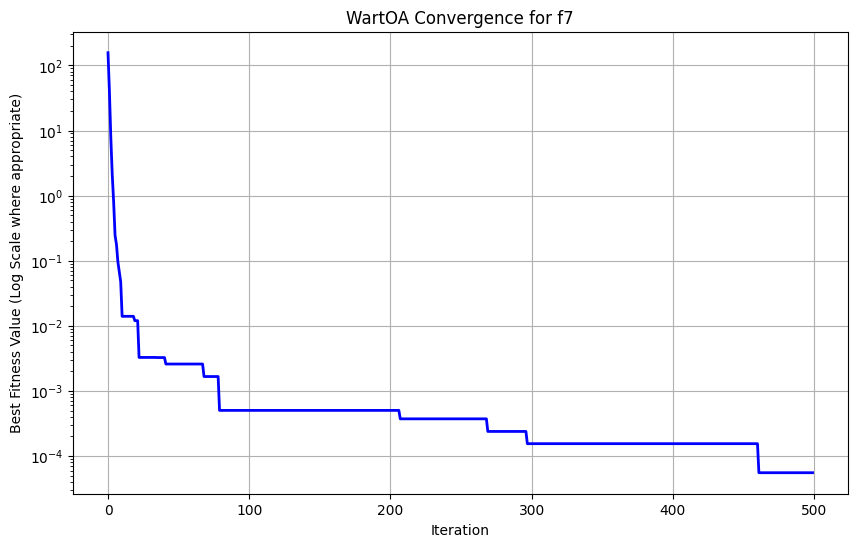


--- Testing Function: f8 ---
  Run 30/30, Best Fitness: -3.859058e+03
-------------------------
Results for f8:
  AVRG : -4.332884e+03
  STD :  4.124899e+02
  Time Taken:   59.03 seconds
-------------------------


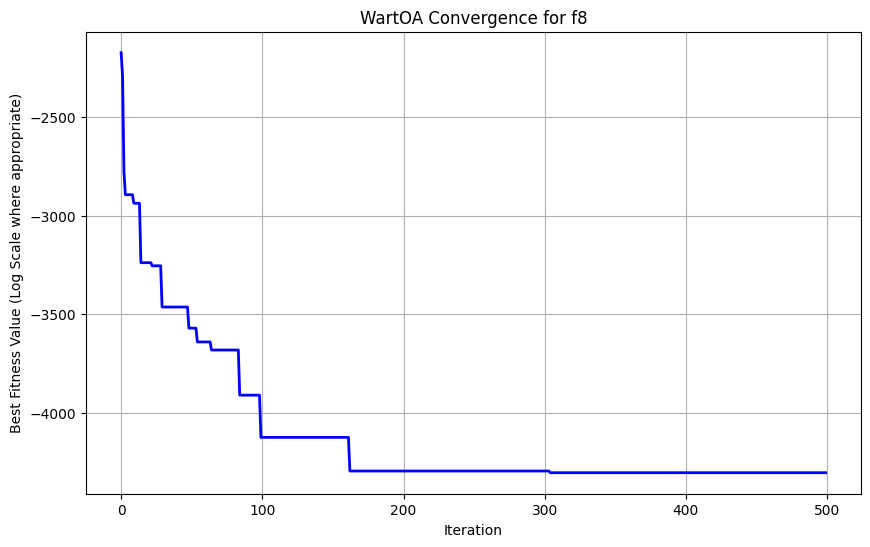


--- Testing Function: f9 ---
  Run 30/30, Best Fitness: 0.000000e+00
-------------------------
Results for f9:
  AVRG : 0.000000e+00
  STD :  0.000000e+00
  Time Taken:   69.95 seconds
-------------------------


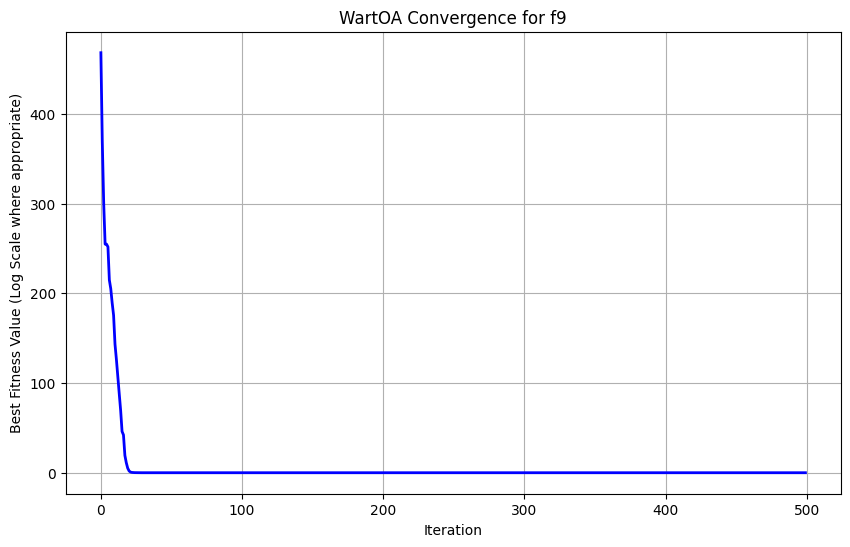


--- Testing Function: f10 ---
  Run 30/30, Best Fitness: 3.996803e-15
-------------------------
Results for f10:
  AVRG : 3.996803e-15
  STD :  0.000000e+00
  Time Taken:   68.28 seconds
-------------------------


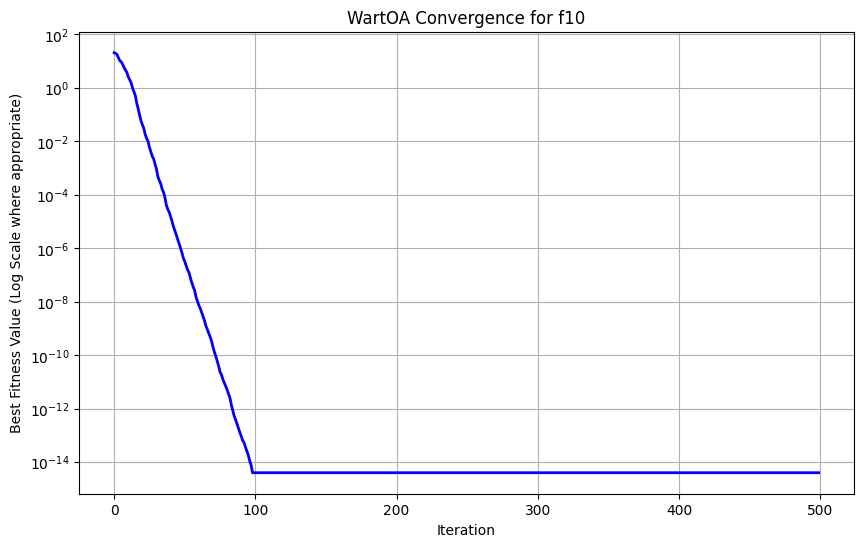


--- Testing Function: f11 ---
  Run 30/30, Best Fitness: 0.000000e+00
-------------------------
Results for f11:
  AVRG : 0.000000e+00
  STD :  0.000000e+00
  Time Taken:   63.57 seconds
-------------------------


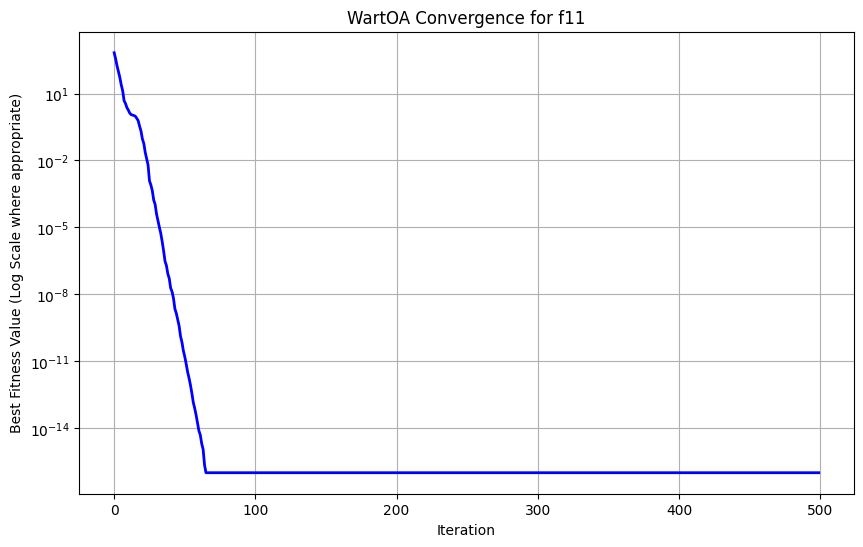


--- Testing Function: f12 ---
  Run 30/30, Best Fitness: 2.585186e-01
-------------------------
Results for f12:
  AVRG : 1.242365e-01
  STD :  3.804720e-02
  Time Taken:   123.63 seconds
-------------------------


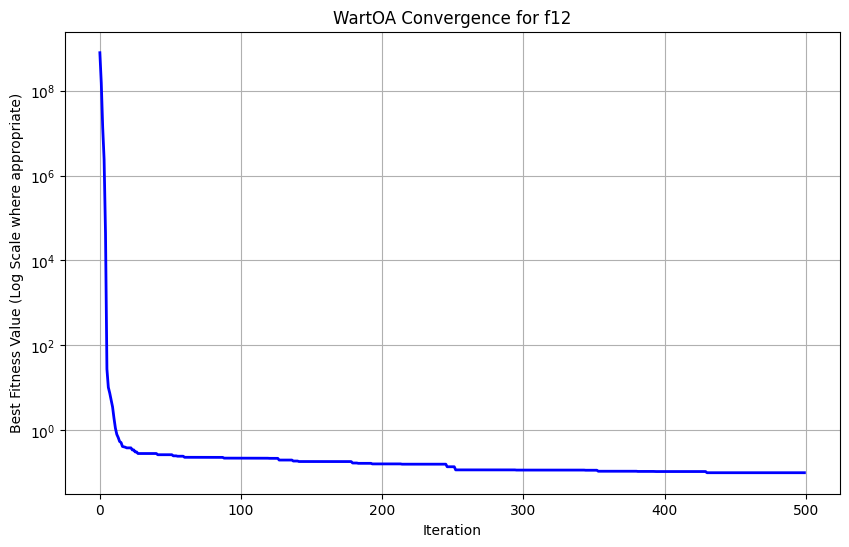


--- Testing Function: f13 ---
  Run 30/30, Best Fitness: 2.139211e-01
-------------------------
Results for f13:
  AVRG : 1.929746e-01
  STD :  2.999759e-02
  Time Taken:   96.98 seconds
-------------------------


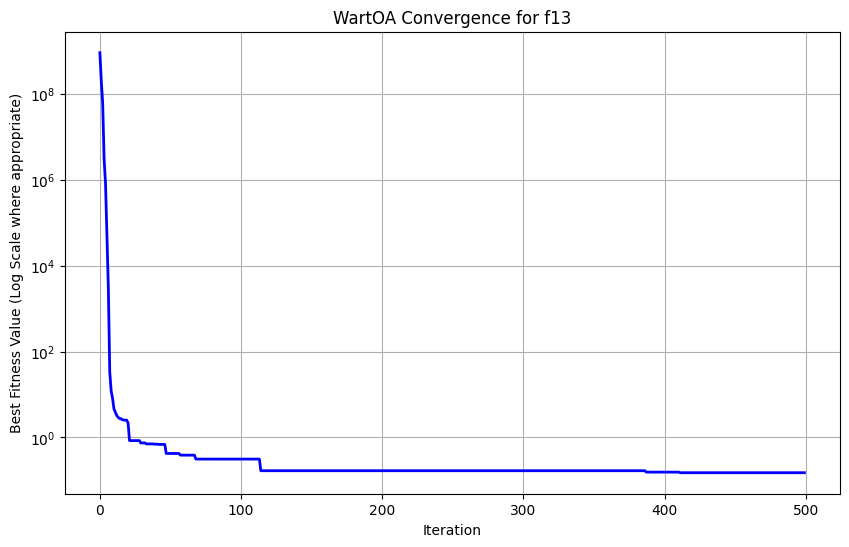


--- Testing Function: f14 ---
  Run 30/30, Best Fitness: 9.980038e-01
-------------------------
Results for f14:
  AVRG : 1.130277e+00
  STD :  4.949218e-01
  Time Taken:   88.35 seconds
-------------------------


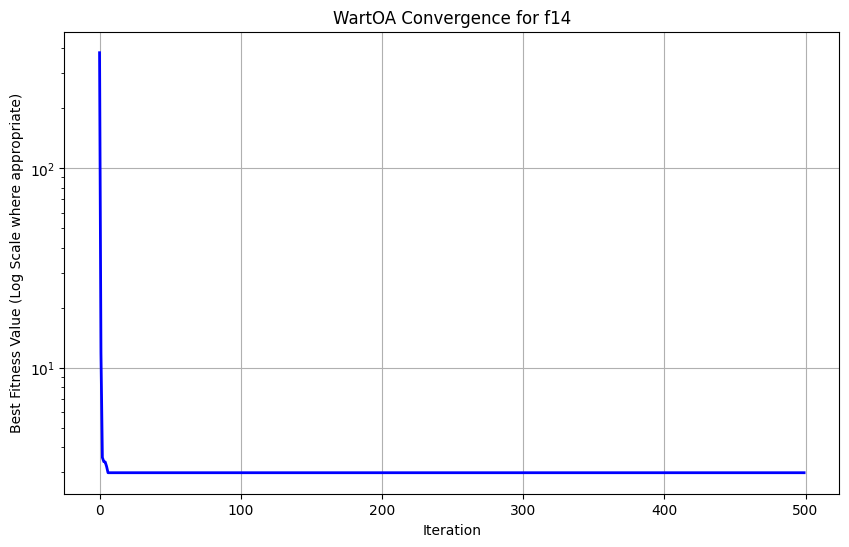


--- Testing Function: f15 ---
  Run 30/30, Best Fitness: 3.074863e-04
-------------------------
Results for f15:
  AVRG : 3.075257e-04
  STD :  1.849413e-07
  Time Taken:   64.89 seconds
-------------------------


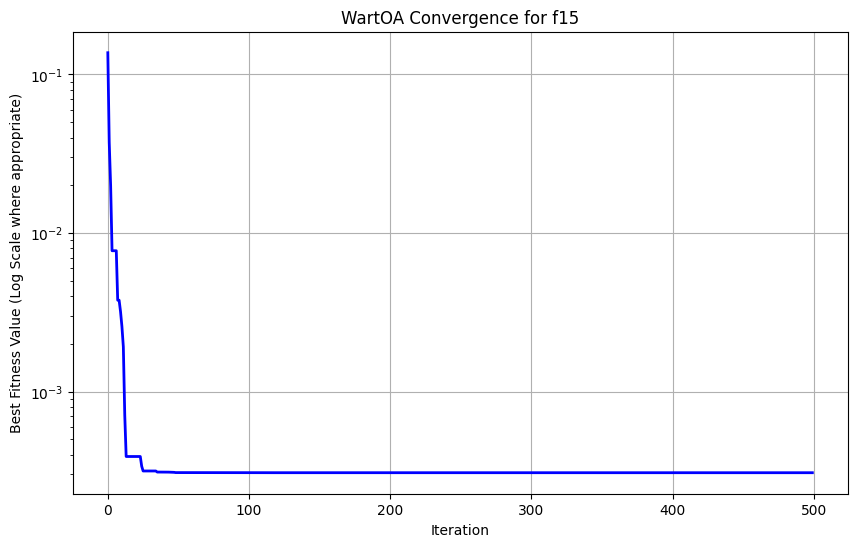


--- Testing Function: f16 ---
  Run 30/30, Best Fitness: -1.031628e+00
-------------------------
Results for f16:
  AVRG : -1.031628e+00
  STD :  2.220446e-16
  Time Taken:   32.12 seconds
-------------------------


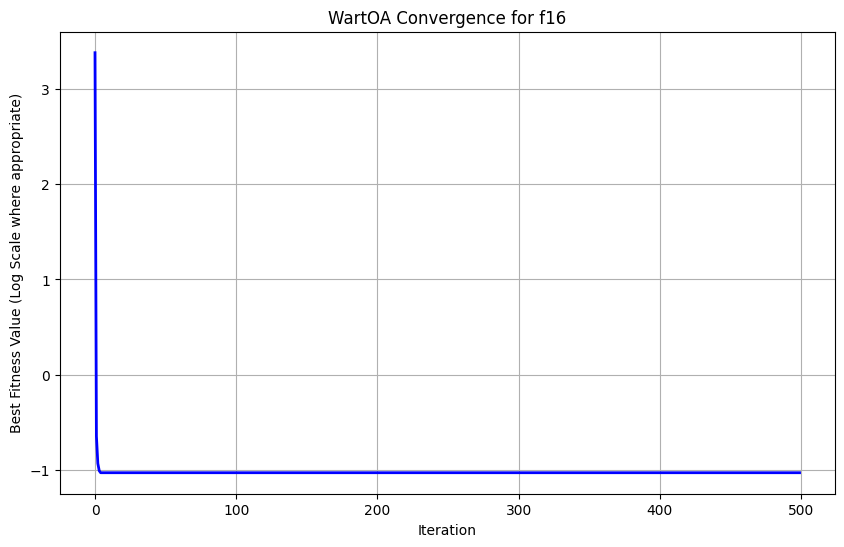


--- Testing Function: f17 ---
  Run 30/30, Best Fitness: 3.978874e-01
-------------------------
Results for f17:
  AVRG : 3.978874e-01
  STD :  0.000000e+00
  Time Taken:   32.59 seconds
-------------------------


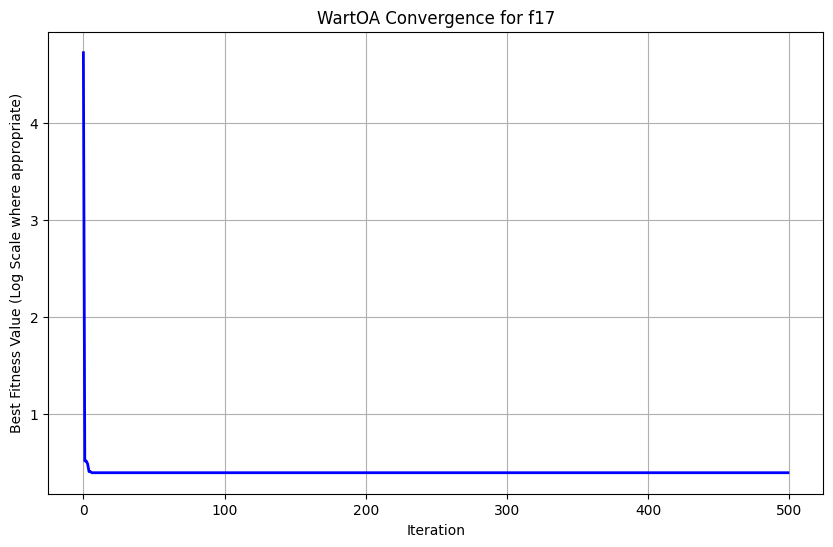


--- Testing Function: f18 ---
  Run 30/30, Best Fitness: 3.000000e+00
-------------------------
Results for f18:
  AVRG : 3.000000e+00
  STD :  6.435464e-16
  Time Taken:   39.51 seconds
-------------------------


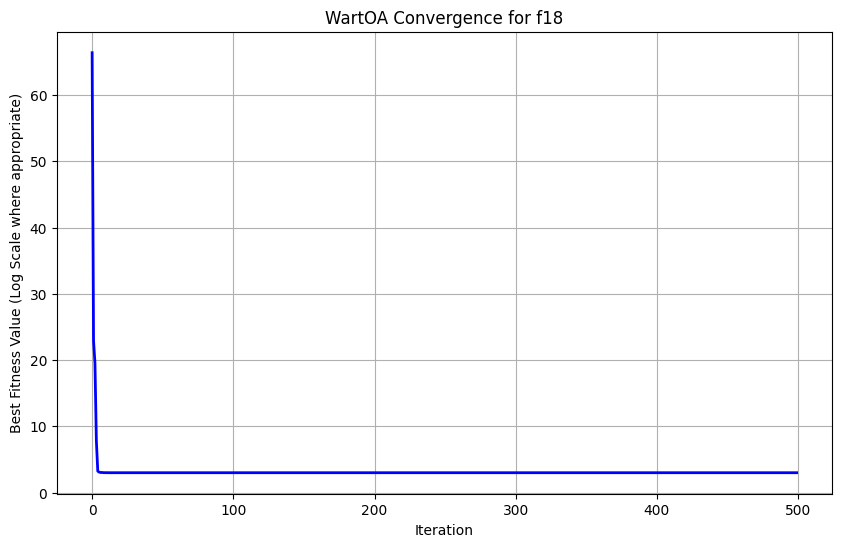


--- Testing Function: f19 ---
  Run 30/30, Best Fitness: -3.862780e+00
-------------------------
Results for f19:
  AVRG : -3.862780e+00
  STD :  1.332268e-15
  Time Taken:   74.78 seconds
-------------------------


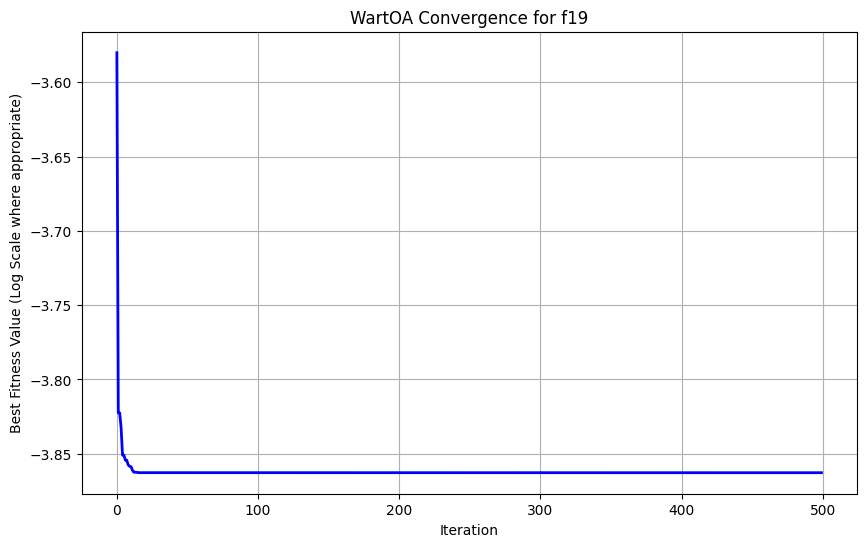


--- Testing Function: f20 ---
  Run 30/30, Best Fitness: -3.203162e+00
-------------------------
Results for f20:
  AVRG : -3.290526e+00
  STD :  5.268285e-02
  Time Taken:   98.87 seconds
-------------------------


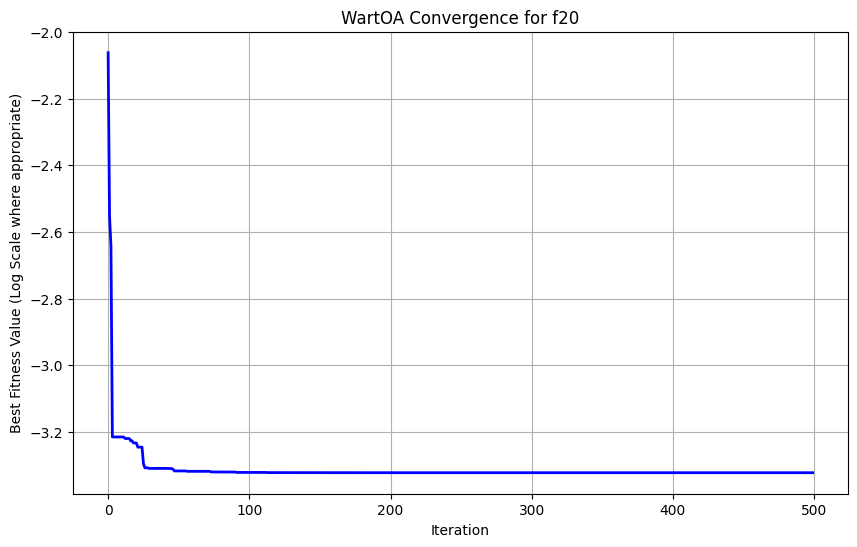


--- Testing Function: f21 ---
  Run 30/30, Best Fitness: -1.005353e+01
-------------------------
Results for f21:
  AVRG : -1.005353e+01
  STD :  1.945901e-15
  Time Taken:   49.82 seconds
-------------------------


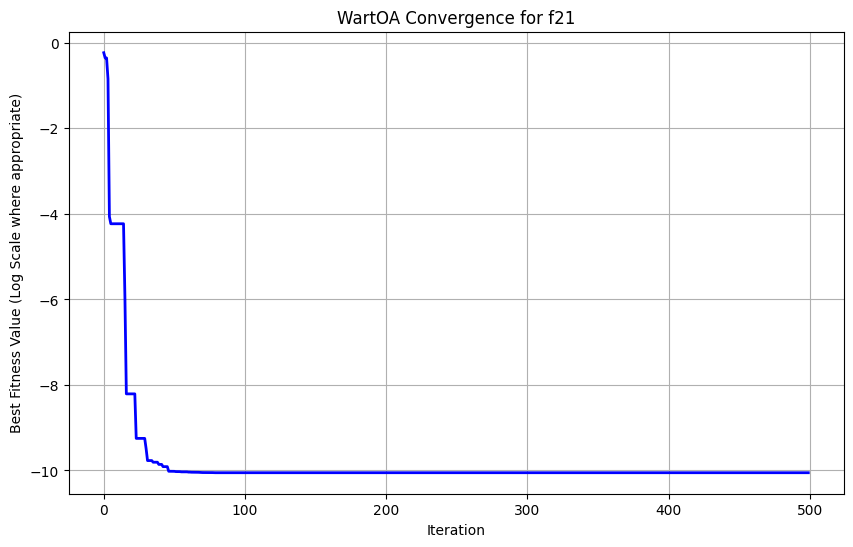


--- Testing Function: f22 ---
  Run 30/30, Best Fitness: -1.006371e+01
-------------------------
Results for f22:
  AVRG : -1.006371e+01
  STD :  1.555369e-15
  Time Taken:   56.42 seconds
-------------------------


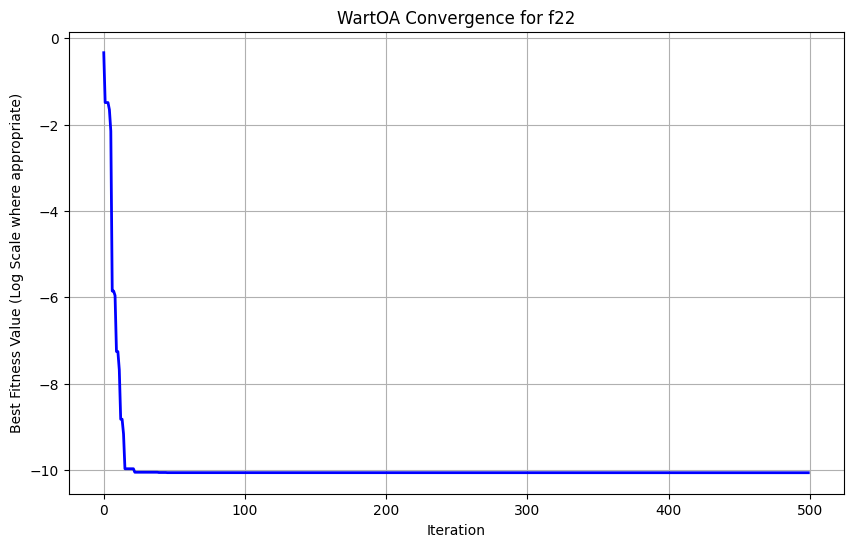


--- Testing Function: f23 ---
  Run 30/30, Best Fitness: -1.007505e+01
-------------------------
Results for f23:
  AVRG : -1.007505e+01
  STD :  3.726118e-15
  Time Taken:   68.37 seconds
-------------------------


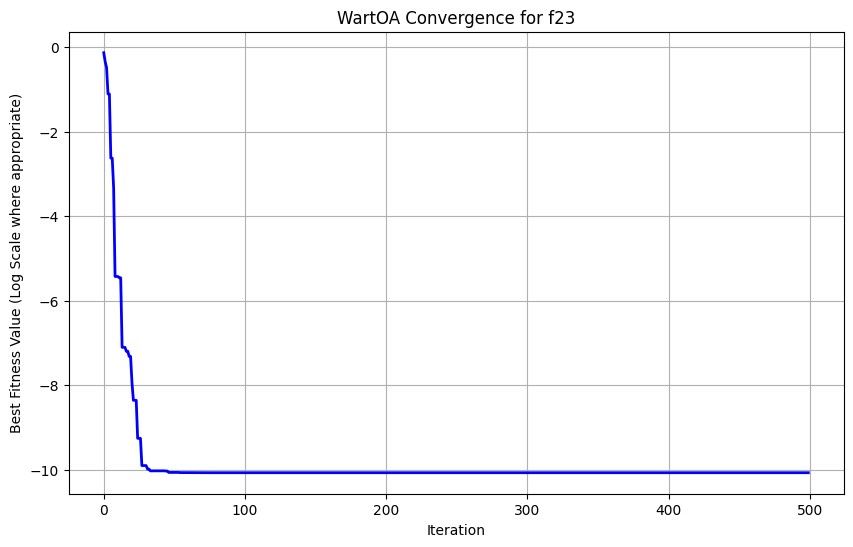

In [5]:
if __name__ == '__main__':
    benchmarks = [
        {'name': 'f1', 'func': f1, 'dim': 30, 'lb': -100, 'ub': 100},
        {'name': 'f2', 'func': f2, 'dim': 30, 'lb': -10, 'ub': 10},
        {'name': 'f3', 'func': f3, 'dim': 30, 'lb': -100, 'ub': 100},
        {'name': 'f4', 'func': f4, 'dim': 30, 'lb': -100, 'ub': 100},
        {'name': 'f5', 'func': f5, 'dim': 30, 'lb': -5, 'ub': 10},
        {'name': 'f6', 'func': f6, 'dim': 30, 'lb': -100, 'ub': 100},
        {'name': 'f7', 'func': f7, 'dim': 30, 'lb': -1.28, 'ub': 1.28},
        {'name': 'f8', 'func': f8, 'dim': 30, 'lb': -500, 'ub': 500},
        {'name': 'f9', 'func': f9, 'dim': 30, 'lb': -5.12, 'ub': 5.12},
        {'name': 'f10', 'func': f10, 'dim': 30, 'lb': -32, 'ub': 32},
        {'name': 'f11', 'func': f11, 'dim': 30, 'lb': -600, 'ub': 600},
        {'name': 'f12', 'func': f12, 'dim': 30, 'lb': -50, 'ub': 50},
        {'name': 'f13', 'func': f13, 'dim': 30, 'lb': -50, 'ub': 50},
        {'name': 'f14', 'func': f14, 'dim': 2, 'lb': -65, 'ub': 65},
        {'name': 'f15', 'func': f15, 'dim': 4, 'lb': -5, 'ub': 5},
        {'name': 'f16', 'func': f16, 'dim': 2, 'lb': -5, 'ub': 5},
        {'name': 'f17', 'func': f17, 'dim': 2, 'lb': -5, 'ub': 5},
        {'name': 'f18', 'func': f18, 'dim': 2, 'lb': -2, 'ub': 2},
        {'name': 'f19', 'func': f19, 'dim': 3, 'lb': 0, 'ub': 1},
        {'name': 'f20', 'func': f20, 'dim': 6, 'lb': 0, 'ub': 1},
        {'name': 'f21', 'func': f21, 'dim': 4, 'lb': 0, 'ub': 10},
        {'name': 'f22', 'func': f22, 'dim': 4, 'lb': 0, 'ub': 10},
        {'name': 'f23', 'func': f23, 'dim': 4, 'lb': 0, 'ub': 10},
    ]
    population_size = 30
    max_iterations = 500
    num_runs = 30
    print("="*60)
    print("Running Paper Implementation of WartOA")
    print(f"Parameters: Pop Size={population_size}, Max Iterations={max_iterations}, Runs={num_runs}")
    print("="*60)
    for bench in benchmarks:
        name, func, dim, lb, ub = bench.values()
        print(f"\n--- Testing Function: {name} ---")
        results = []
        start_time = time.time()
        first_run_history = None
        for run in range(num_runs):
            if run == 0:
                _, best_fitness, first_run_history = WaOA(
                    obj_func=func, dim=dim, N=population_size,
                    max_iter=max_iterations, lb=lb, ub=ub
                )
            else:
                _, best_fitness, _ = WaOA(
                    obj_func=func, dim=dim, N=population_size,
                    max_iter=max_iterations, lb=lb, ub=ub
                )
            results.append(best_fitness)
            print(f"  Run {run+1}/{num_runs}, Best Fitness: {best_fitness:.6e}", end='\r')
        end_time = time.time()
        avrg_fitness, std_fitness = np.mean(results), np.std(results)
        print("\n" + "-"*25)
        print(f"Results for {name}:")
        print(f"  AVRG : {avrg_fitness:.6e}")
        print(f"  STD :  {std_fitness:.6e}")
        print(f"  Time Taken:   {end_time - start_time:.2f} seconds")
        print("-"*25)

        # MODIFIED: Pass the function name to the plotting function
        if first_run_history:
            plot_convergence(first_run_history, name)